In [281]:
import cv2
from skimage.segmentation import felzenszwalb
import matplotlib.pyplot as plt
from selectivesearch import selective_search
import numpy as np
import torch
import torch.nn as nn
import torchvision.ops as ops

In [216]:
img = cv2.imread('data/dummy/img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

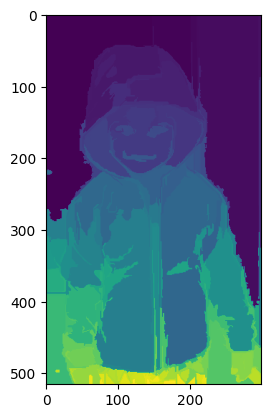

In [217]:
segmented = felzenszwalb(img, scale=150)
# segmented.shape
plt.imshow(segmented)

In [222]:
img_area = np.prod(img.shape[:2])
img_label, regions = selective_search(img, scale=200, min_size=2000)
img_area * 0.05

7740.0

In [231]:
big_regions = []
for region in regions:
    if region['size'] > 0.05 * img_area and region['rect'] not in big_regions:
        big_regions.append(region['rect'])

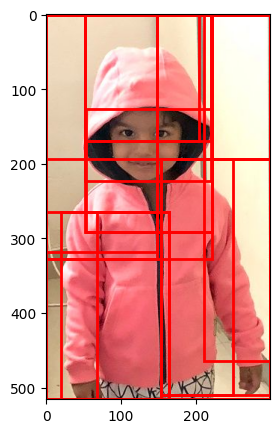

In [232]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(img)

for x, y, w, h in big_regions:
    rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', linewidth=2)
    ax.add_patch(rect)

In [271]:
def extract_box_points(box: tuple) -> tuple:
    x1, y1, w, h = box
    x2, y2 = x1 + w, y1 + h,
    
    return (x1, y1), (x2, y2)
    
def get_boxes_intersection(box_a, box_b):
    x_right = min(box_a[1][0], box_b[1][0])
    y_down = max(box_a[1][1], box_b[1][1])
    
    x_left = max(box_a[0][0], box_b[0][0])
    y_up = max(box_a[0][1], box_b[0][1])
    
    if x_left > x_right or y_up > y_down:
        return (-1, -1), (-1, -1)
    
    return (x_left, y_up), (x_right, y_down)


def calculate_iou(box_a: tuple, box_b: tuple, epsilon=1e-8):
    a_area = box_a[2] * box_a[3]
    b_area = box_b[2] * box_b[3]
    
    a_points = extract_box_points(box_a)
    b_points = extract_box_points(box_b)
    
    intersection = get_boxes_intersection(a_points, b_points)
    
    inter_w = intersection[0][0] - intersection[1][0]
    inter_h = intersection[0][1] - intersection[1][0]
    inter_area = inter_w * inter_h
    
    union_area = a_area + b_area - inter_area
    
    return inter_area / (union_area + epsilon)

In [282]:
box_a = [0, 0, 10, 10]
box_b = [10, 10, 10, 10]

calculate_iou(box_a, box_b)

0.0

In [1]:
boxes = torch.tensor([
    [50, 50, 100, 100],
    [60, 60, 110, 110],
    [200, 200, 250, 250.],
])

boxes_wh = torch.tensor([
    [50, 50, 50, 50],
    [60, 60, 50, 50],
    [200, 200, 50, 50]
])

scores = torch.tensor([0.5, 0.9, 0])
ops.nms(boxes, scores, 0.4706)

NameError: name 'torch' is not defined